# Foremast-brain Algorithms

In [57]:
import numpy as np
import pandas as pd
import json
from datetime import datetime
from dateutil.parser import parse
import sys
sys.path.append('../')
from mlalgms.statsmodel import calculateHistoricalParameters

## load data from csv

In [58]:
anomaly_data = pd.read_csv("../../test_data/timeserials2.csv")
### print size
print(anomaly_data.shape)
### print columns
print(anomaly_data.columns.values)

(4032, 2)
['timestamp' 'value']


In [59]:
from mlalgms.statsmodel import detectAnomalies
from utils.converterutils import addHeader

In [60]:


idx = anomaly_data.timestamp.values
anomaly_data_ds = [parse(d) for d in idx ]
y = anomaly_data.value.values
df = addHeader (anomaly_data_ds, y)





## PLT the data graph

In [61]:
# Drawing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from IPython.core.pylabtools import figsize

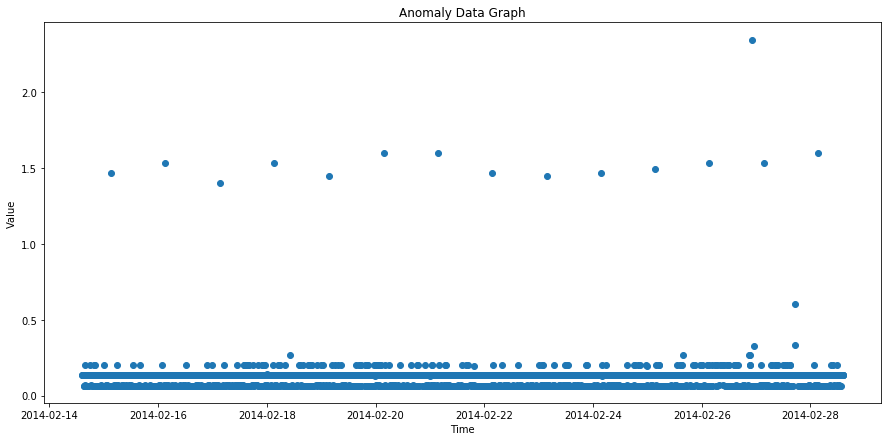

In [62]:
#concert date format from string to datetime for display
plt_ds = [date2num(d)  for d in anomaly_data_ds]
plt.figure(figsize=(15, 7))
plt.plot_date(plt_ds, df.y)
plt.title('Anomaly Data Graph')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


# MOVING_AVERAGE_ALL ALGM

## No Test Train Split Anomaly Detection

In [63]:
#Calculate mean,stdev
mean, deviation = calculateHistoricalParameters(df)
print(mean,", ",deviation)

0.1263030753968258 ,  0.09480108880679933


In [64]:
#detect anomalies
ads, atsdata,anomalies = detectAnomalies( df,mean, deviation)

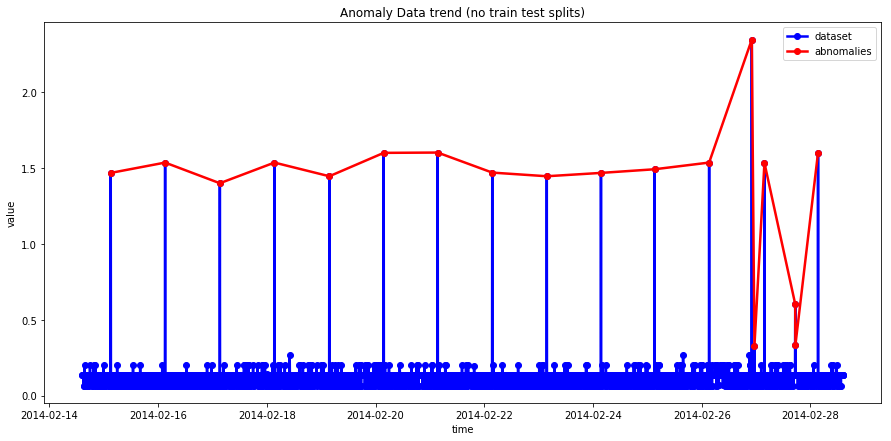

In [65]:

plt.figure(figsize=(15, 7))




plt.plot_date(plt_ds, df.y,color="blue", linewidth=2.5, linestyle="-", label='dataset')
plat_ads= [date2num(d)  for d in ads]

plt.plot_date(plat_ads, atsdata,color="red", linewidth=2.5, linestyle="-", label='abnomalies')
plt.title('Anomaly Data trend (no train test splits)')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()


## Test Train Split Anomaly Detection

In [66]:
from mlalgms.evaluator import ts_train_test_split

In [67]:
train, test = ts_train_test_split(df, split_ratio=0.7)

plat_train = [date2num(d)  for d in train.index.get_values()]
plat_test_origin = [date2num(d)  for d in test.index.get_values()]

In [68]:
mean_train, deviation_train = calculateHistoricalParameters(train)
print(mean_train,",", deviation_train)

0.12473068745570433 , 0.08772672220980536


In [69]:
ts_test, adata_test,anomalies_test = detectAnomalies( test,mean_train, deviation_train)

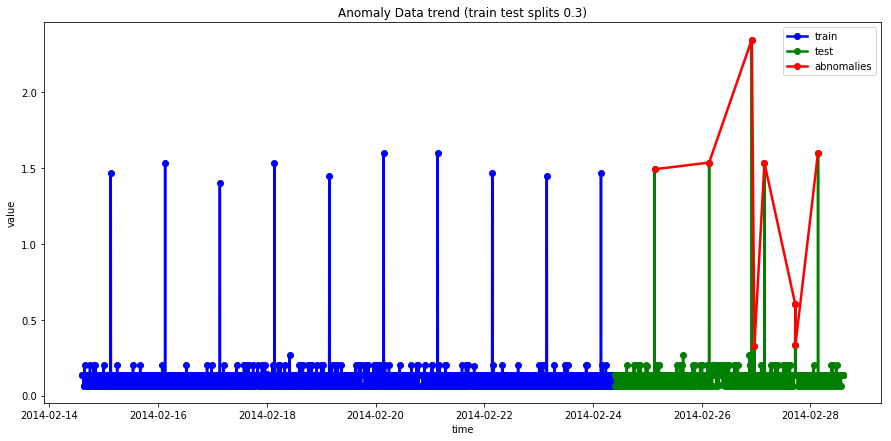

In [70]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-", label='train')
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-", label='test')
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-", label='abnomalies')

plt.title('Anomaly Data trend (train test splits 0.3)')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

# MOVING_AVERAGE ALGORITHM

In [71]:
from mlalgms.statsmodel import calculateMovingAverageParameters,detectLowerUpperAnomalies

In [72]:
lower_bound, upper_bound = calculateMovingAverageParameters(train, 0, 2)
print(lower_bound, ", ", upper_bound) 

0.11746137491140865 ,  0.132


In [73]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

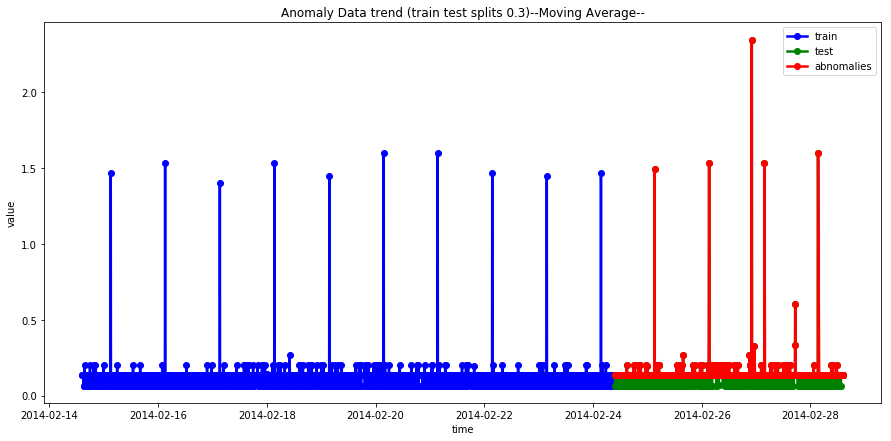

In [74]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))
plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-", label='train')
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-", label='test')
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-", label='abnomalies')

plt.title('Anomaly Data trend (train test splits 0.3)--Moving Average--')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

# EXPONENTIAL_SMOOTHING Algorithm

In [75]:
from mlalgms.statsmodel import calculateExponentialSmoothingParameters

In [76]:
lower_bound, upper_bound= calculateExponentialSmoothingParameters(train, 0.1, 2)
print(lower_bound, ", ", upper_bound) 

-0.08068032655630081 ,  0.3036230873192595


In [77]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

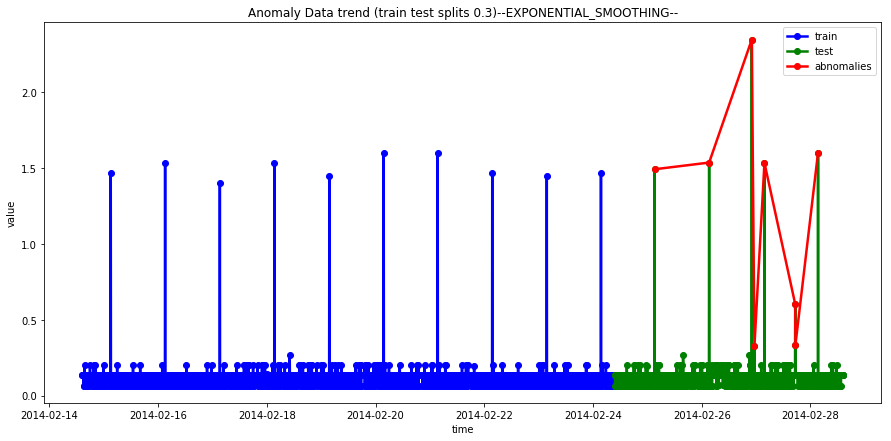

In [78]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))
plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-", label='train')
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-", label='test')
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-", label='abnomalies')

plt.title('Anomaly Data trend (train test splits 0.3)--EXPONENTIAL_SMOOTHING--')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

# DOUBLE_EXPONENTIAL_SMOOTHING Algorithm

In [79]:
from mlalgms.statsmodel import calculateDoubleExponentialSmoothingParameters

In [80]:
lower_bound, upper_bound= calculateDoubleExponentialSmoothingParameters(train, 0.2, 0.8, 2)
print(lower_bound, ", ", upper_bound) 


-0.09475620989445495 ,  0.30913441615047893


In [81]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

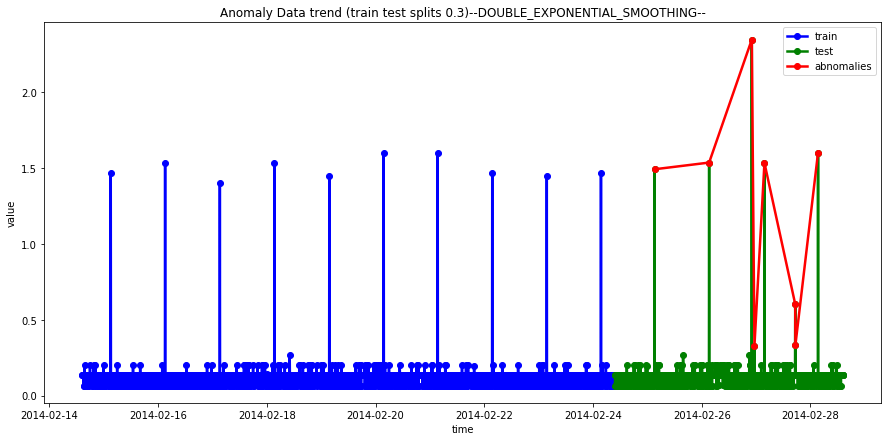

In [82]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-", label='train')
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-", label='test')
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-", label='abnomalies')
plt.title('Anomaly Data trend (train test splits 0.3)--DOUBLE_EXPONENTIAL_SMOOTHING--')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

# PROPHET Algorithm

In [83]:
from mlalgms.fbprophet  import predictNoneSeasonalityProphetLast
import warnings
warnings.filterwarnings("ignore")


In [84]:
def totimestamp(np_dt):
   return (np_dt - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


In [85]:

idx = train.index.get_values()
p_ts = [totimestamp(d) for d in idx]
print(type(p_ts[0]))
p_utc = [datetime.utcfromtimestamp(int(d)) for d in p_ts]
print(type(p_utc[0]))

df_prophet = addHeader (p_ts, train.y.values, p_utc,False)
#print(train.y)
#print(df_prophet)

#df_prophet['y'].notnull()

<class 'numpy.float64'>
<class 'datetime.datetime'>


In [86]:
lower_bound, upper_bound = predictNoneSeasonalityProphetLast(df_prophet, 1,'T') 
print(lower_bound, ", ", upper_bound) 


0.004697494659857439 ,  0.22287295998610612


In [87]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

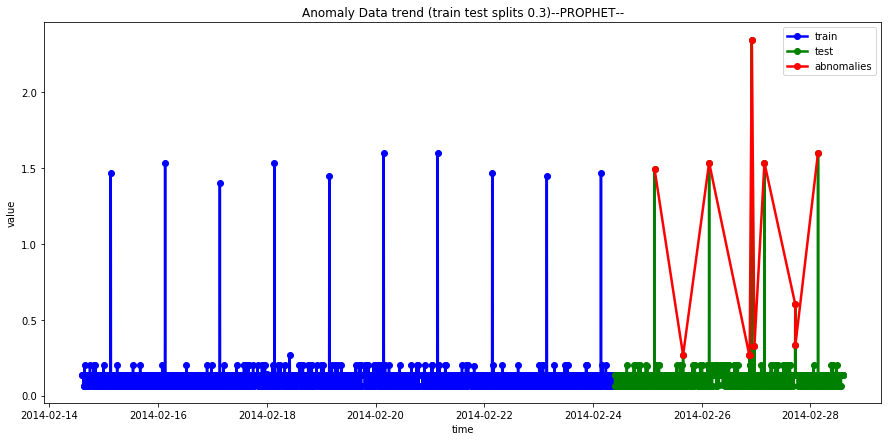

In [88]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-", label='train')
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-", label='test')

plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-", label='abnomalies')

plt.title('Anomaly Data trend (train test splits 0.3)--PROPHET--')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()